## **Imports**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **Exploração e Limpeza dos Dados**

In [ ]:
# Carregar o arquivo CSV enviado
file_path = './SupplyChainGHGEmissionFactors_v1.2_NAICS_CO2e_USD2021.csv'
data = pd.read_csv(file_path)

In [ ]:
# Exibir as primeiras linhas do dataframe para inspeção
data.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [ ]:
data.describe()

,2017 NAICS Code,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
count,1016.000000,1016.00000,1016.000000,1016.000000
mean,424917.376969,0.35787,0.028172,0.386014
std,164942.113495,0.55562,0.040568,0.569845
min,111110.000000,0.01300,0.000000,0.013000
25%,325588.250000,0.12300,0.000000,0.128750
50%,423700.000000,0.18700,0.000000,0.208000
75%,532111.250000,0.40150,0.049000,0.448250
max,813990.000000,10.98900,0.270000,10.989000


## **Análise Exploratória de Dados (EDA)**

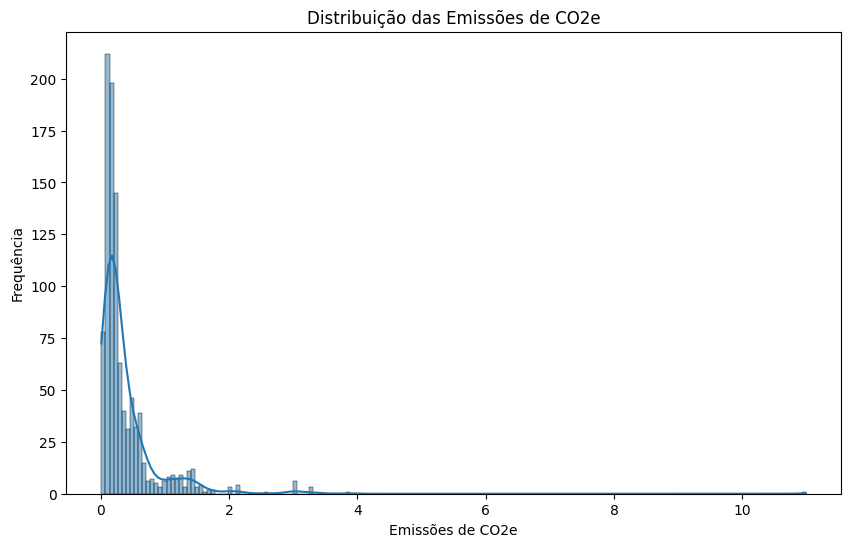

In [20]:
# Visualizar a distribuição das emissões de CO2e
data = data.rename(columns={'Supply Chain Emission Factors with Margins': 'CO2e_Emissions'})
plt.figure(figsize=(10, 6))
sns.histplot(data['CO2e_Emissions'], kde=True)
plt.title('Distribuição das Emissões de CO2e')
plt.xlabel('Emissões de CO2e')
plt.ylabel('Frequência')
plt.show()

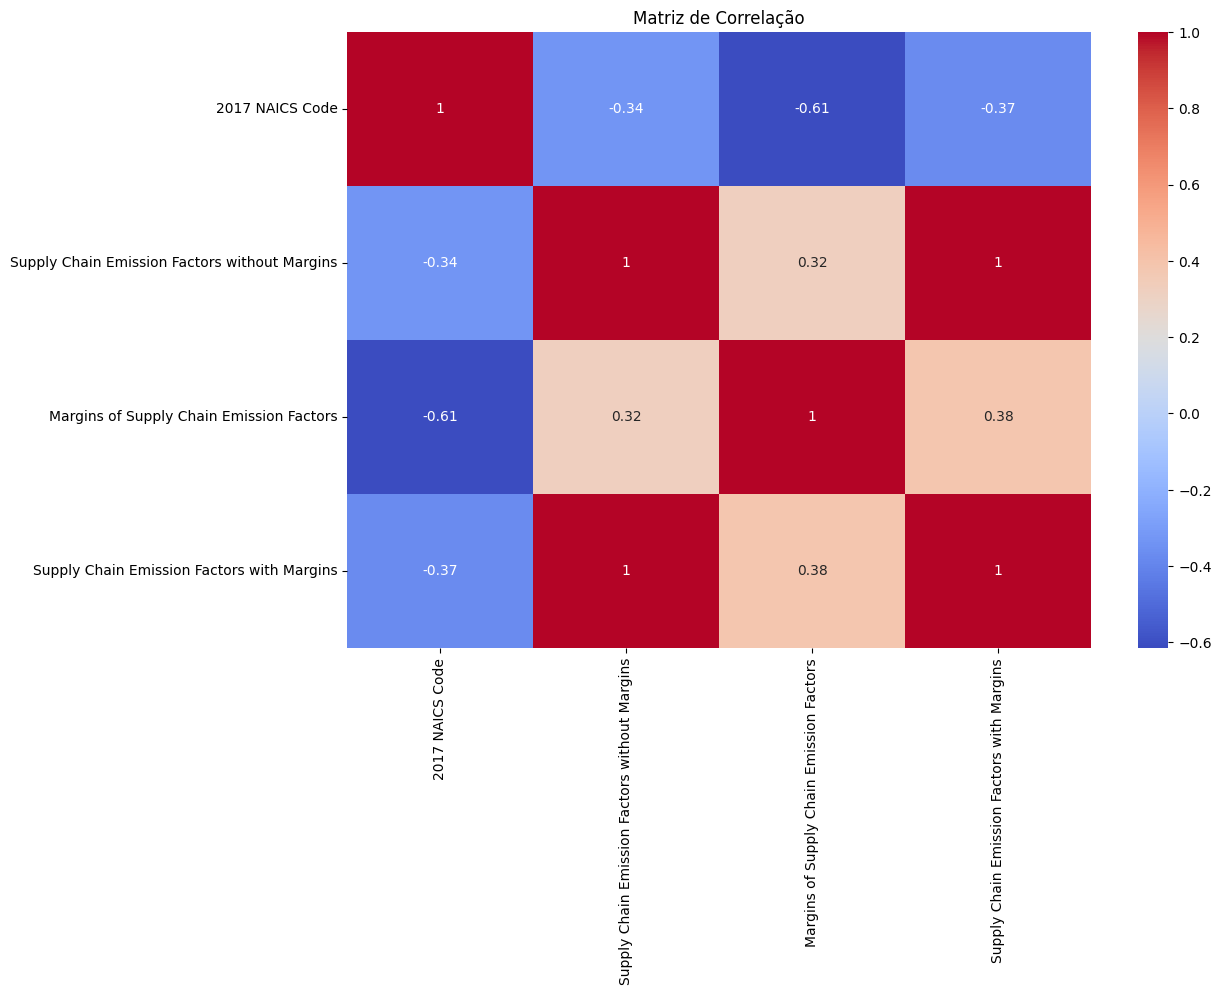

In [18]:
# Matriz de correlação
numerical_data = data.select_dtypes(include=['float', 'int'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## **Pré-processamento dos Dados**

In [21]:
# Separar as features e o target
X = data.drop('CO2e_Emissions', axis=1)
y = data['CO2e_Emissions']

In [33]:
# Codificação de variáveis categóricas e normalização
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [35]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Pipeline com pré-processamento e modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [39]:
# Treinar o modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['2017 NAICS Code', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['2017 NAICS Title', 'GHG', 'Unit', 'Reference USEEIO Code'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [40]:
# Previsões
y_pred = pipeline.predict(X_test)

In [41]:
# Avaliação do modelo
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

RMSE: 0.5384079770216895
MAE: 0.042726764705882374
R²: 0.60166966574698
